<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (White wine data)

The dataset contains information about several factors describing the quality of white wine. <br> Attribute information: 

**Fixed_Acidity:** The ph value for titrable acid content (0-7)

**Volatile_Acidity:** Measure of acidity due to bacteria

**Citric_Acid:** Amount of citric acid present in wine

**Residual_Sugar:** Amount of grape sugar in gms/litre

**Chlorides:** Amount of chlorides present in wine

**Free_Sulfur-dioxide:** Amount of SO2 that is not bound to other molecules

**Total_Sulfur-dioxide:** Portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine

**Density:** Density of wine (gms/cm<sup>3</sup>)

**pH:** The pH value of wine (0-14)

**Sulphates:** Amount of salts of sulphuric acid 

**Alcohol:** Alcohol content in percentage

**Quality:** Wine quality 

Data citation: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

## Table of Content

1. **[Feature Transformation](#trans)**
2. **[Feature Selection](#sel)**
3. **[Model Validation](#cv)**

**Import the required libraries**

In [121]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.tsa.api as smt

# import various functions from scipy
from scipy import stats
# import various functions from scipy
from scipy import stats

# import 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import StandardScaler for scaling the data
from sklearn.preprocessing import StandardScaler

# functions for forward selection

from sklearn.feature_selection import RFE

# functions for linear regression
from sklearn.linear_model import LinearRegression

# functions for  cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing


In [122]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [123]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

#### Load the first dataset and check the first two observations

In [4]:
# load your data
# type your code here
df_wine=pd.read_csv('whitewine.csv',sep=';')
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.000000,0.270000,0.360000,20.700000,0.045000,45.000000,170.000000,1.001000,3.000000,0.450000,8.800000,6
1,6.300000,0.300000,0.340000,1.600000,0.049000,14.000000,132.000000,0.994000,3.300000,0.490000,9.500000,6
2,8.100000,0.280000,0.400000,6.900000,0.050000,30.000000,97.000000,0.995100,3.260000,0.440000,10.100000,6
3,7.200000,0.230000,0.320000,8.500000,0.058000,47.000000,186.000000,0.995600,3.190000,0.400000,9.900000,6
4,7.200000,0.230000,0.320000,8.500000,0.058000,47.000000,186.000000,0.995600,3.190000,0.400000,9.900000,6


In [6]:
# check data types of variables
# type your code here
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


### Let's begin with some hands-on practice exercises

<a id="trans"> </a>
## 1. Feature Transformation

## We shall use the wine quality dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Does the variable 'volatile acidity' need transformation ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

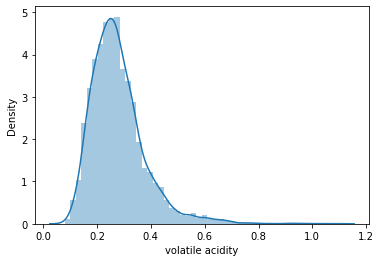

In [5]:
# type your code here
sns.distplot(df_wine['volatile acidity'])

In [6]:
df_wine['volatile acidity'].skew()

1.5769795029952025

In [55]:
#'volatile acidity' feature is not normally distributed ,it is rightly skewed so we
#we can easily infer that this feature needs the transformation.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. How can we reduce skewness of variable 'Residual_Sugar'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
# type your code here
df_wine['residual sugar'].skew()

1.0770937564240868

In [9]:
df_wine['residual sugar']=np.log(df_wine['residual sugar'])
df_wine['residual sugar'].skew()

-0.1611568975182972

In [10]:
#power transform used well for transformation but preferebly i use log because i don't want to transform the whole dataset.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there features in the dataset that add little to no information ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
y=df_wine['quality']
X=df_wine.drop('quality',axis=1)
X=sm.add_constant(X)
wine_model=sm.OLS(y,X).fit()
print(wine_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     170.8
Date:                Fri, 06 Aug 2021   Prob (F-statistic):               0.00
Time:                        01:42:02   Log-Likelihood:                -5557.8
No. Observations:                4898   AIC:                         1.114e+04
Df Residuals:                    4886   BIC:                         1.122e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   47.7566 

In [12]:
df_wine.var()

fixed acidity             0.712114
volatile acidity          0.010160
citric acid               0.014646
residual sugar            0.849615
chlorides                 0.000477
free sulfur dioxide     289.242720
total sulfur dioxide   1806.085491
density                   0.000009
pH                        0.022801
sulphates                 0.013025
alcohol                   1.514427
quality                   0.784356
dtype: float64

In [13]:
#'density','citric acid','clorides','fixed acidity'  etc columns accoding to the p_val has littile to no information.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Which transformation method is best suited to treat the skewness in variable 'alcohol'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
# type your code here
df_wine['alcohol'].skew()

0.4873419932161276

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

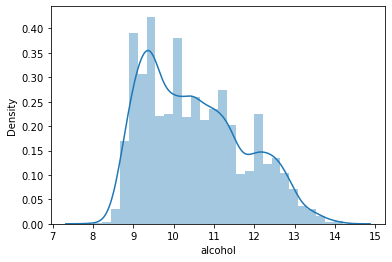

In [15]:
sns.distplot(df_wine['alcohol'])

In [16]:
#not such skew in that feature still we can transform.

In [17]:
df_wine['alcohol']=np.reciprocal(df_wine['alcohol'])
df_wine['alcohol'].skew()

-0.13935230629934492

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

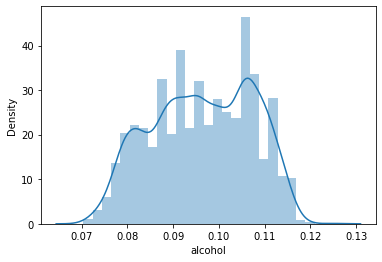

In [18]:
sns.distplot(df_wine['alcohol'])

In [19]:
#reciprocal transformation suits best for this transformation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Does scaling the feature 'pH' lead to better prediction when considering a full model ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
# type your code here
y=df_wine['quality']
X=df_wine.drop('quality',axis=1)
X=sm.add_constant(X)
wine_model=sm.OLS(y,X).fit()
print(wine_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     163.5
Date:                Fri, 06 Aug 2021   Prob (F-statistic):          2.67e-322
Time:                        01:42:06   Log-Likelihood:                -5587.0
No. Observations:                4898   AIC:                         1.120e+04
Df Residuals:                    4886   BIC:                         1.128e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   72.0830 

In [21]:
#use standard scaller for 'pH'
scl=StandardScaler()
df_wine['pH']=scl.fit_transform(df_wine[['pH']])

In [22]:
y=df_wine['quality']
X=df_wine.drop('quality',axis=1)
X=sm.add_constant(X)
wine_model=sm.OLS(y,X).fit()
print(wine_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     163.5
Date:                Fri, 06 Aug 2021   Prob (F-statistic):          2.67e-322
Time:                        01:42:07   Log-Likelihood:                -5587.0
No. Observations:                4898   AIC:                         1.120e+04
Df Residuals:                    4886   BIC:                         1.128e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   73.1675 

In [23]:
#there is no changes.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. What could be done to resolve the issue of multicollinearity if present?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
# type your code here
vif=pd.DataFrame()
X=df_wine.iloc[:,:11]
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i)for i in range (X.shape[1])]
print(vif)

                features        VIF
0          fixed acidity  91.600329
1       volatile acidity   9.668835
2            citric acid   9.968113
3         residual sugar   5.005804
4              chlorides   6.474855
5    free sulfur dioxide   9.258756
6   total sulfur dioxide  25.317141
7                density 208.863124
8                     pH   1.335730
9              sulphates  20.579932
10               alcohol 129.889489


In [25]:
#density has the highest vif so we first remove density
X1=X.drop('density',axis=1)
vif=pd.DataFrame()
vif['features']=X1.columns
vif['VIF']=[variance_inflation_factor(X1.values, i)for i in range (X1.shape[1])]
print(vif)

               features       VIF
0         fixed acidity 59.246821
1      volatile acidity  8.561955
2           citric acid  9.931699
3        residual sugar  4.933262
4             chlorides  6.408280
5   free sulfur dioxide  8.895443
6  total sulfur dioxide 23.904535
7                    pH  1.214838
8             sulphates 18.907860
9               alcohol 74.993219


In [26]:
#now the highest vif is 'pH'
X_pH=X1.drop('pH',axis=1)
vif=pd.DataFrame()
vif['features']=X_pH.columns
vif['VIF']=[variance_inflation_factor(X_pH.values, i)for i in range (X_pH.shape[1])]
print(vif)

               features       VIF
0         fixed acidity 53.877730
1      volatile acidity  8.542273
2           citric acid  9.914149
3        residual sugar  4.721159
4             chlorides  6.336252
5   free sulfur dioxide  8.895389
6  total sulfur dioxide 23.742051
7             sulphates 17.769584
8               alcohol 72.756819


In [27]:
#remove 'fixed acidity'
X_fa=X_pH.drop('fixed acidity',axis=1)
vif=pd.DataFrame()
vif['features']=X_fa.columns
vif['VIF']=[variance_inflation_factor(X_fa.values, i)for i in range (X_fa.shape[1])]
print(vif)

               features       VIF
0      volatile acidity  8.127741
1           citric acid  8.570817
2        residual sugar  4.667796
3             chlorides  6.212874
4   free sulfur dioxide  8.869158
5  total sulfur dioxide 23.739263
6             sulphates 17.217793
7               alcohol 41.798857


In [28]:
#drop 'alcohol'
X_alcohol=X_fa.drop('alcohol',axis=1)
vif=pd.DataFrame()
vif['features']=X_alcohol.columns
vif['VIF']=[variance_inflation_factor(X_alcohol.values, i)for i in range (X_alcohol.shape[1])]
print(vif)

               features       VIF
0      volatile acidity  7.370797
1           citric acid  7.756011
2        residual sugar  4.420607
3             chlorides  5.525161
4   free sulfur dioxide  8.851497
5  total sulfur dioxide 21.950560
6             sulphates 12.725635


In [29]:
#drop 'sulphate'
X_S=X_alcohol.drop('sulphates',axis=1)
vif=pd.DataFrame()
vif['features']=X_S.columns
vif['VIF']=[variance_inflation_factor(X_S.values, i)for i in range (X_S.shape[1])]
print(vif)

               features       VIF
0      volatile acidity  6.516528
1           citric acid  6.657543
2        residual sugar  4.396867
3             chlorides  5.452575
4   free sulfur dioxide  8.832658
5  total sulfur dioxide 20.191431


In [30]:
#drop 'total sulfur dioxide'
X_sd=X_S.drop('total sulfur dioxide',axis=1)
vif=pd.DataFrame()
vif['features']=X_sd.columns
vif['VIF']=[variance_inflation_factor(X_sd.values, i)for i in range (X_sd.shape[1])]
print(vif)

              features      VIF
0     volatile acidity 5.545674
1          citric acid 6.173615
2       residual sugar 4.021996
3            chlorides 5.195957
4  free sulfur dioxide 5.338635


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7.  Fit a full model. Is the assumption for normality of residuals violated ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [135]:
wine_df=pd.read_csv('whitewine.csv',sep=';')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.000000,0.270000,0.360000,20.700000,0.045000,45.000000,170.000000,1.001000,3.000000,0.450000,8.800000,6
1,6.300000,0.300000,0.340000,1.600000,0.049000,14.000000,132.000000,0.994000,3.300000,0.490000,9.500000,6
2,8.100000,0.280000,0.400000,6.900000,0.050000,30.000000,97.000000,0.995100,3.260000,0.440000,10.100000,6
3,7.200000,0.230000,0.320000,8.500000,0.058000,47.000000,186.000000,0.995600,3.190000,0.400000,9.900000,6
4,7.200000,0.230000,0.320000,8.500000,0.058000,47.000000,186.000000,0.995600,3.190000,0.400000,9.900000,6


In [48]:
wine_df.shape

(4898, 12)

In [41]:
y=wine_df['quality']
X=wine_df.iloc[:,:11]
X=sm.add_constant(X)
model_wine=sm.OLS(y,X).fit()
reseduals=model_wine.resid
print(model_wine.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Fri, 06 Aug 2021   Prob (F-statistic):               0.00
Time:                        01:48:05   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  150.1928 

In [ ]:
 probability of jakie bura test is less than 0.05 so that so can conclude that the data is not normal.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Does the transformation of variable 'citric acid' affect the performance of prediction model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [42]:
# type your code here
y=wine_df['quality']
X=wine_df.iloc[:,:11]
X=sm.add_constant(X)
model_wine=sm.OLS(y,X).fit()
reseduals=model_wine.resid
print(model_wine.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Fri, 06 Aug 2021   Prob (F-statistic):               0.00
Time:                        01:48:08   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  150.1928 

In [43]:
wine_df['citric acid'].skew()

1.2819203981671066

In [44]:
wine_df['citric acid']=np.sqrt(wine_df['citric acid'])
wine_df['citric acid'].skew()

-0.4268446359148293

In [47]:
X=wine_df.iloc[:,:11]
X=sm.add_constant(X)
y=wine_df['quality']
wine_model=sm.OLS(y,X).fit()
reseduals=wine_model.resid
print(wine_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     174.6
Date:                Fri, 06 Aug 2021   Prob (F-statistic):               0.00
Time:                        01:54:56   Log-Likelihood:                -5542.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  151.5545 

In [ ]:
#after doing transformation coefficient has increased but the r2 is same.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Fit a full model. Check whether variable has linear relationship with the wine quality<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [54]:
# type your code here
X=wine_df.iloc[:,:11]
X=sm.add_constant(X)
y=wine_df['quality']
wine_model=sm.OLS(y,X).fit()

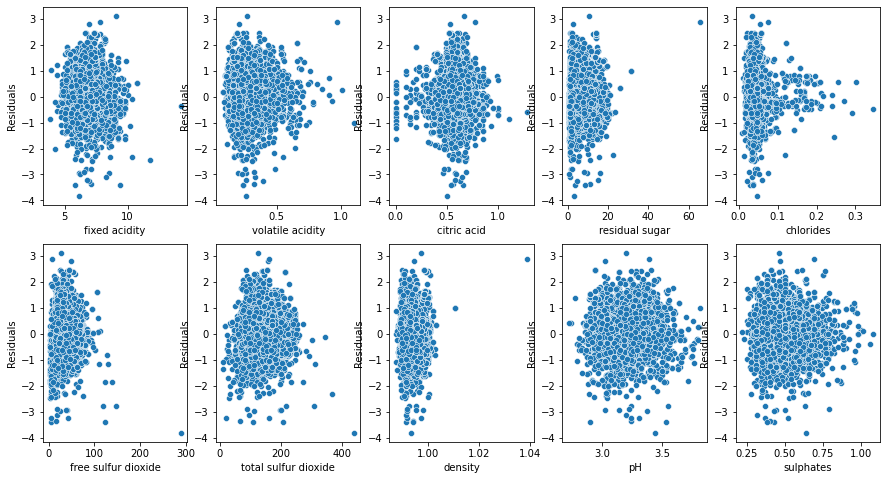

In [55]:
reseduals=wine_model.resid
fix, ax=plt.subplots(nrows=2,ncols=5,figsize=(15,8))
for variable,subplot in zip(X.columns[1:],ax.flatten()):
    z=sns.scatterplot(X[variable],reseduals,ax=subplot)
    z.set_ylabel('Residuals',fontsize=10)

<a id="sel"> </a>
## 2. Feature Selection

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Find the top five significant variables from the dataset using forward selection technique. Also display the R-squared score for the model built using these five variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [136]:
# type your code here
X=wine_df.iloc[:,:11]
y=wine_df['quality']
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=10)
LR=LinearRegression()

In [137]:
ln_for=sfs(estimator=LR,k_features=5,forward=True,verbose=2,scoring='r2')
sfs_for=ln_for.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2021-08-06 03:01:02] Features: 1/5 -- score: 0.18565846860352717[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2021-08-06 03:01:03] Features: 2/5 -- score: 0.23629929361188456[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2021-08-06 03:01:03] Features: 3/5 -- score: 0.2540012055405943[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [138]:
sfs_for.k_feature_names_

('fixed acidity', 'volatile acidity', 'residual sugar', 'sulphates', 'alcohol')

In [139]:
sfs_for.k_score_

0.2642089894983086

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Find the top five significant variables from the dataset using backward elimination technique. Also display the R-squared score for the model built using these five variables.<br><br> Compare the R-squared value obtained from question 10 with the value obtained using backward elimination.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [141]:
# type your code here
ln_fr=sfs(estimator=LR,k_features=5,forward=False,verbose=2,scoring='r2')
sfs_back=ln_fr.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2021-08-06 03:01:34] Features: 10/5 -- score: 0.27247557939574385[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2021-08-06 03:01:34] Features: 9/5 -- score: 0.27332087940704247[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2021-08-06 03:01:34] Features: 8/5 -- score: 0.27377527983238825[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 

In [142]:
sfs_back.k_feature_names_

('volatile acidity', 'residual sugar', 'density', 'sulphates', 'alcohol')

In [143]:
sfs_back.k_score_

0.2667934266541911

In [ ]:
#r2 score are quite increse forward selection r2 is 0.264 and backward ellimination 0.266

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Find the best set of significant variables from the dataset using forward selection technique such that the selected set should have 2 to 6 features. Also display the R-squared score for the model built using the selected variables</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [144]:
# type your code here
ln_fr1=sfs(estimator=LR,k_features=(2,6),forward=True,verbose=2,scoring='r2')
sfs_for1=ln_fr1.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2021-08-06 03:01:54] Features: 1/6 -- score: 0.18565846860352717[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2021-08-06 03:01:54] Features: 2/6 -- score: 0.23629929361188456[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2021-08-06 03:01:54] Features: 3/6 -- score: 0.2540012055405943[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [145]:
sfs_for1.k_feature_names_

('fixed acidity',
 'volatile acidity',
 'residual sugar',
 'density',
 'sulphates',
 'alcohol')

In [146]:
sfs_for1.k_score_

0.26743382195827714

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Find the best set of significant variables from the dataset using forward selection technique. Also display the R-squared score for the model built using the selected variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [147]:
# type your code here
ln_fr2=sfs(estimator=LR,k_features='best',forward=True,verbose=2,scoring='r2')
sfs_fr2=ln_fr2.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2021-08-06 03:02:22] Features: 1/11 -- score: 0.18565846860352717[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2021-08-06 03:02:22] Features: 2/11 -- score: 0.23629929361188456[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2021-08-06 03:02:22] Features: 3/11 -- score: 0.2540012055405943[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done

In [148]:
sfs_fr2.k_feature_names_

('fixed acidity',
 'volatile acidity',
 'residual sugar',
 'free sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol')

In [149]:
sfs_fr2.k_score_

0.2720017182304336

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Find the best set of significant variables from the dataset using backward elimination technique. Also display the R-squared score for the model built using the selected variables. <br><br>Compare the R-squared value obtained from question 13 with the value obtained using backward elimination.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [150]:
# type your code here
ln_fr3=sfs(estimator=LR,k_features='best',forward=False,verbose=2,scoring='r2')
sfs_back1=ln_fr3.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2021-08-06 03:03:17] Features: 10/1 -- score: 0.27247557939574385[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2021-08-06 03:03:17] Features: 9/1 -- score: 0.27332087940704247[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2021-08-06 03:03:17] Features: 8/1 -- score: 0.27377527983238825[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 

In [151]:
sfs_back1.k_feature_names_

('volatile acidity',
 'residual sugar',
 'free sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol')

In [152]:
sfs_back1.k_score_

0.27397516464601546

In [ ]:
#for forward selection it is 0.27200 and for backword selection 0.27397 quite increase the accurecy

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Find the best set of significant variables from the dataset among all the possible subsets of the variables. Build a linear regression model using the best subset and find the R-Squared value for that model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [153]:
# type your code here
modl_rfe=RFE(estimator=LR,n_features_to_select=5)
model=modl_rfe.fit(X_train,y_train)

In [156]:
findex=pd.DataFrame(data=model.ranking_,index=X_train.columns)
findex

,0
fixed acidity,5
volatile acidity,1
citric acid,3
residual sugar,4
chlorides,1
free sulfur dioxide,6
total sulfur dioxide,7
density,1
pH,2
sulphates,1


In [158]:
index[index[0]==1]

,0
volatile acidity,1
chlorides,1
density,1
sulphates,1
alcohol,1


In [160]:
X_train1= X_train[['volatile acidity','chlorides', 'density','sulphates','alcohol']]
LR.fit(X_train1, y_train)
r2=LR.score(X_train1, y_train)
print(r2)

0.24986127870481523


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Calculate the RMSE for the train set and test set for the model created using the top 5 variables obtained from forward selection in question 10. Check if the model is overfitted on the train set or not. If yes, then why do you think so?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [161]:
X =wine_df.iloc[:,:11]
y =wine_df['quality']
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=.2, random_state=10)
LR=LinearRegression()


In [162]:
lin_for= sfs(estimator=LR, k_features=5, forward=True,scoring= 'r2')
sfs_for= lin_for.fit(X_train, y_train)

In [163]:
f=list(sfs_for.k_feature_names_)
X= X[f]
X_train1, X_test1, y_train1, y_test1= train_test_split(X,y,test_size=.2, random_state=10)

LR.fit(X_train1, y_train1)


LinearRegression()

In [164]:
ypred1=LR.predict(X_train1)
ypred2=LR.predict(X_test1)


In [166]:
mse1= mean_squared_error(y_train1, ypred1)
mse2= mean_squared_error(y_test1, ypred2)

mse1 , mse2

(0.5767545215693153, 0.5688963831482611)

In [ ]:
#for the dataset which i have from the q.10 we can say there is not much difference in the rmse so there is not such offerfiiting

<a id="cv"> </a>
## 3. Model Validation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Create a new feature based on the 'pH' which tells whether wine is acidic, basic or neutral. Will this variable significantly contribute to the model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [167]:
# type your code here
#3.5-4.8---acidic
New_pH=[]

for i in range(0,wine_df.pH.shape[0]):
    if wine_df.pH.iloc[i]==7:
        New_pH.append('N')
    elif wine_df.pH.iloc[i]>7:
        New_pH.append('B')
    elif wine_df.pH.iloc[i]<7:
        New_pH.append('A')
        
wine_df['New_pH']=New_pH

In [168]:
wine_df.New_pH.value_counts()

A    4898
Name: New_pH, dtype: int64

In [ ]:
#we donot have that much contribution fron this attribute to the model.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Fit the a full model. Validate the model using cross validation method</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [169]:
# type your code here
X=wine_df.iloc[:,:11]
y=wine_df['quality']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
LR=LinearRegression()

In [170]:
score=cross_val_score(estimator=LR,X=X,y=y,cv=5,scoring='r2')

In [171]:
score.mean()

0.24577850482967145

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Fit the a full model. Validate the model using 5 - fold cross validation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [172]:
# type your code here
X=wine_df.iloc[:,:11]
y=wine_df['quality']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
LR=LinearRegression()

In [174]:
score=cross_val_score(estimator=LR,X=X,y=y,cv=5,scoring='r2')
score

array([0.20126776, 0.29276052, 0.27466003, 0.30555263, 0.15465158])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Fit the a full model. Validate the model using leave one out cross validation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [175]:
# type your code here
l1=LeaveOneOut()
l1.get_n_splits(X)


4898

In [182]:
loocv_rmse = []
loocv = LeaveOneOut()
for train_index, test_index in loocv.split(X_train):
    X_train_l, X_test_l, y_train_l, y_test_l = X_train.iloc[train_index], X_train.iloc[test_index], \
    y_train.iloc[train_index], y_train.iloc[test_index]
linreg = LinearRegression()
linreg.fit(X_train_l, y_train_l)
mse = mean_squared_error(y_test_l, linreg.predict(X_test_l))
rmse = np.sqrt(mse)
loocv_rmse.append(rmse)

In [183]:
np.mean(loocv_rmse)

0.15704001289458347